# Clustering tasks for the k-mean Clustering

* Task 0
Initializing the cluster **Centroids** for k-mean

In [4]:
#!/usr/bin/env python3
"""
Initializes the cluster Centroids for k-means clustering.
"""


import numpy as np


def initialize(X, k):
    """
    Initializes the cluster Centroids for k-means clustering.
    
    Parameters:
        X is a numpy.ndarray of shape (n, d) containing the dataset
        -> n is the number of data points in the dataset
        -> d is the number of dimensions in the dataset
        
        k is a positive integer containing the number of clusters
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None
    if not isinstance(k, int) or k < 1:
        return None
    
    n, d = X.shape
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    
    return np.random.uniform(x_min, x_max, size=(k, d))


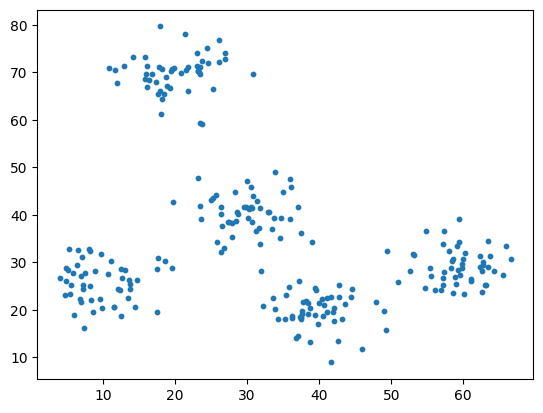

[[14.54730144 13.46780434]
 [20.57098466 33.55245039]
 [ 9.55556506 51.51143281]
 [48.72458008 20.03154959]
 [25.43826106 60.35542243]]


In [5]:
# main file

import matplotlib.pyplot as plt

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    plt.scatter(X[:, 0], X[:, 1], s=10)
    plt.show()
    print(initialize(X, 5))

## Task 1.

* We will perform k-means on a dataset.

So no more initializations

In [6]:
#!/usr/bin/env python3
"""
Performs k-means clustering on a data set.
"""


import numpy as np


def kmeans(X, k, iterations=1000):
    """
    Performs k-means clustering on a data set.
    
    Parameters:
        X is a numpy.ndarray of shape (n, d) containing the dataset
            -> n is the number of data points in the dataset
            -> d is the number of dimensions in the dataset
        
        k is a positive integer containing the number of clusters
        
        iterations is a positive integer containing the maximum number
        of iterations
        
    Returns:
        C: numpy.ndarray of shape (k, d) containing the centroid means for each
        cluster
        clss: numpy.ndarray of shape (n,) containing the index of the cluster
        in C that each data point belongs to
    """
    if not isinstance(X, np.ndarray) or len(X.shape) != 2:
        return None, None
    if not isinstance(k, int) or k < 1:
        return None, None
    if not isinstance(iterations, int) or iterations < 1:
        return None, None
    
    n, d = X.shape
    x_min = X.min(axis=0)
    x_max = X.max(axis=0)
    
    C = np.random.uniform(x_min, x_max, size=(k, d))
    
    for i in range(iterations):
        centroids = np.copy(C)
        centroids_extend = C[:, np.newaxis]
        
        distances = np.sqrt(((X - centroids_extend) ** 2).sum(axis=2))
        clss = np.argmin(distances, axis=0)
        
        for c in range(k):
            if X[clss == c].size == 0:
                C[c] = np.random.uniform(x_min, x_max, size=(1, d))
            else:
                C[c] = X[clss == c].mean(axis=0)
        
        
            centroids_extend = C[:, np.newaxis]
            distances = np.sqrt(((X - centroids_extend) ** 2).sum(axis=2))
            clss = np.argmin(distances, axis=0)

        if (centroids == C).all():
            break

    return C, clss




# Task 2 done for speed issues
def variance(X, C):
    """
    Calculates the variance of the cluster centroids.
    """
    n, d = X.shape
    centeroids_extend = C[:, np.newaxis]
    distances = np.sqrt(((X - centeroids_extend) ** 2).sum(axis=2))
    
    min_distances = np.min(distances, axis=0)
    variance = np.sum(min_distances ** 2)
    
    return variance

[[ 9.92511389 25.73098987]
 [30.06722465 40.41123947]
 [39.62770705 19.89843487]
 [59.22766628 29.19796006]
 [20.0835633  69.81592298]]


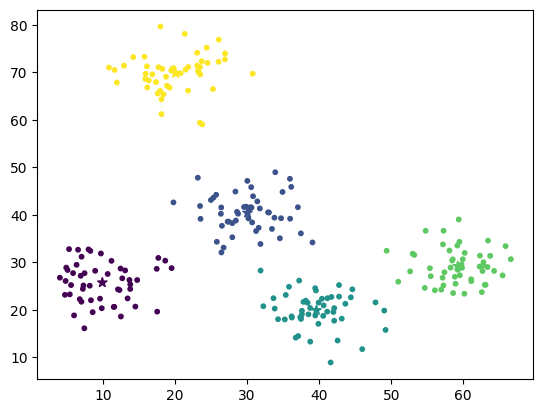

In [7]:
# main file

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)
    C, clss = kmeans(X, 5)
    print(C)
    plt.scatter(X[:, 0], X[:, 1], s=10, c=clss)
    plt.scatter(C[:, 0], C[:, 1], s=50, marker='*', c=list(range(5)))
    plt.show()

# Task 3 Variance + kmeans

* Calculates the Variance of the k-means Clustering

## Variance

* The function **def optimum_k(X, kmin=1, kmax=None, iterations=1000):** tests for the optimum number of clusters by variance.
- X is a numpy.ndarray of shape (n, d) containing the data set
kmin is a positive integer containing the minimum number of clusters to check for (inclusive)
* kmax is a positive integer containing the maximum number of clusters to check for (inclusive)
- iterations is a positive integer containing the maximum number of iterations for K-means
* This function should analyze at least 2 different cluster sizes
You should use:
kmeans = __import__('1-kmeans').kmeans
variance = __import__('2-variance').variance
- At most 2 loops must be used
* Returns: results, d_vars, or None, None on failure
results is a list containing the outputs of K-means for each cluster size
d_vars is a list containing the difference in variance from the smallest cluster size for each cluster size

In [8]:
#!/usr/bin/env pyhon3
"""
Tests for the optimum number of clusters by variance.
"""


kmeans = __import__("1-kmeans").kmeans
variance = __import__("2-variance").variance
import numpy as np


def optimum_k(X, kmin=1, kmax=None, iterations=1000):
    """
    Tests for the optimum number of clusters by variance.
    """
    try:
        if not isinstance(X, np.ndarray) or len(X.shape) != 2:
            return None, None
        if not isinstance(iterations, int) or iterations < 1:
            return None, None
        if kmax is not None and (type(kmax) is not int or kmax < 1):
            return None, None
        if kmax is not None and kmin >= kmax:
            return None, None
        if kmax is None:
            kmax = X.shape[0]
        if not isinstance(kmin, int) or kmin < 1 or kmin >= X.shape[0]:
            return None, None
        
        results = []
        d_vars = []
        
        for k in range(kmin, kmax + 1):
            cluster, clss = kmeans(X, k, iterations)
            results.append((cluster, clss))
            variance_d = variance(X, cluster)
            if k == kmin:
                variance_k = variance_d
            d_vars.append(variance_k - variance_d)
        return results, d_vars
    
    except Exception:
        return None, None


[(array([[31.78625503, 37.01090945]]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)), (array([[34.76990289, 28.71421162],
       [20.14417812, 69.38429903]]), array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0

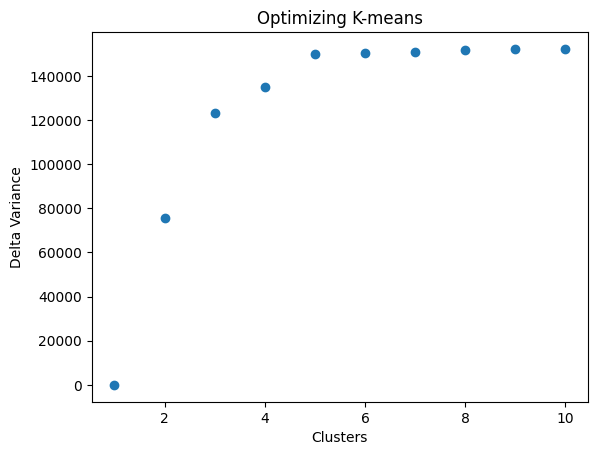

In [9]:
# main func

if __name__ == "__main__":
    np.random.seed(0)
    a = np.random.multivariate_normal([30, 40], [[16, 0], [0, 16]], size=50)
    b = np.random.multivariate_normal([10, 25], [[16, 0], [0, 16]], size=50)
    c = np.random.multivariate_normal([40, 20], [[16, 0], [0, 16]], size=50)
    d = np.random.multivariate_normal([60, 30], [[16, 0], [0, 16]], size=50)
    e = np.random.multivariate_normal([20, 70], [[16, 0], [0, 16]], size=50)
    X = np.concatenate((a, b, c, d, e), axis=0)
    np.random.shuffle(X)

    results, d_vars = optimum_k(X, kmax=10)
    print(results)
    print(np.round(d_vars, 5))
    plt.scatter(list(range(1, 11)), d_vars)
    plt.xlabel('Clusters')
    plt.ylabel('Delta Variance')
    plt.title('Optimizing K-means')
    plt.show()